# Problem definition

## Airbnb Price Prediction with Machine Learning


**Airbnb** é um marketplace de aluguéis de curto prazo que permite que anfitriões anunciem parte ou todo o seu espaço de moradia para que outras pessoas reservem. A plataforma inclui desde quartos privados até casas inteiras. Graças à sua flexibilidade e preços competitivos, o Airbnb se tornou uma das principais alternativas aos hotéis em todo o mundo. Desde sua fundação em 2008, a empresa cresceu exponencialmente: abriu capital em dezembro de 2020 com uma avaliação de cerca de **US\$ 47 bilhões** e, em 2025, sua capitalização de mercado ultrapassa **US\$ 85 bilhões**, tornando-a mais valiosa que a maioria das redes hoteleiras globais.


### The Pricing Challenge

Um dos maiores desafios para os anfitriões é definir o preço ideal por noite. Em muitas cidades, os viajantes têm à disposição uma grande variedade de anúncios e podem filtrar por critérios como:

* preço
* número de quartos
* tipo de propriedade
* localização

Como o Airbnb é um marketplace competitivo, o valor que um anfitrião pode cobrar está diretamente ligado à dinâmica de oferta e demanda.

* Se o anfitrião definir um preço muito acima da média local, os hóspedes provavelmente escolherão alternativas mais baratas, mas semelhantes.
* Se o preço for muito baixo, o anfitrião perde receita potencial.


### A Simple Strategy


Uma abordagem simples para definição de preços poderia ser:

1. Identificar anúncios semelhantes.
2. Calcular o preço médio entre eles.
3. Usar esse valor como preço de referência.

Embora seja simples, essa estratégia não captura totalmente a complexidade do marketplace.



### Machine Learning for Price Prediction


O processo de usar dados existentes para prever resultados futuros é chamado de aprendizado de máquina. No nosso caso, queremos usar dados de anúncios locais para prever a tarifa ideal por noite.

Nesta lição, vamos explorar um **modelo de regressão linear regularizada** (implementado no [repositório mlops](https://github.com/ivanovitchm/mlops)).

Esse modelo ajusta uma função matemática aos dados disponíveis, capturando relações entre múltiplas variáveis — como número de quartos, localização e tipo de propriedade — e estimando seu impacto no preço final. Diferente das estratégias baseadas apenas em médias simples, a regressão oferece uma forma mais sistemática de generalizar e fazer previsões robustas em diferentes cenários.


### Next Step


Antes de nos aprofundarmos no modelo, vamos primeiro nos familiarizar com o conjunto de dados com o qual iremos trabalhar.

# Introduction to the data


Embora o AirBnB não divulgue dados oficiais sobre os anúncios disponíveis em seu marketplace, uma iniciativa independente chamada [Inside AirBnB](https://insideairbnb.com/rio-de-janeiro/) extraiu e publicou dados de uma amostra de anúncios para muitas das principais cidades presentes na plataforma.

Nesta lição, vamos trabalhar com o conjunto de dados de **março de 2025**, focando nos anúncios do **Rio de Janeiro, Brasil**, a mundialmente famosa capital do samba. Aqui está um [link direto para o dataset](https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2025-03-19/data/listings.csv.gz). Cada linha desse conjunto de dados corresponde a uma propriedade específica disponível para aluguel de curto prazo no AirBnB no Rio de Janeiro.

Para tornar o conjunto de dados mais fácil de manipular, removemos muitas das mais de 100 colunas originais. Abaixo estão as colunas selecionadas que manteremos para nossa análise:

* **host\_response\_rate**: taxa de resposta do anfitrião
* **host\_acceptance\_rate**: percentual de solicitações ao anfitrião que se convertem em reservas
* **host\_listings\_count**: número de outros anúncios gerenciados pelo anfitrião
* **latitude**: latitude das coordenadas geográficas da propriedade
* **longitude**: longitude das coordenadas geográficas da propriedade
* **city**: a cidade onde a propriedade está localizada
* **zipcode**: o código postal da propriedade
* **state**: o estado onde a propriedade está localizada
* **accommodates**: número de hóspedes que a propriedade pode receber
* **room\_type**: tipo de acomodação (Quarto privado, Quarto compartilhado ou Casa/apartamento inteiro)
* **bedrooms**: número de quartos incluídos no aluguel
* **bathrooms**: número de banheiros disponíveis
* **beds**: número de camas incluídas
* **price**: preço da diária
* **cleaning\_fee**: taxa adicional cobrada pela limpeza após a estadia do hóspede
* **security\_deposit**: depósito de segurança reembolsável em caso de danos
* **minimum\_nights**: número mínimo de noites exigidas para uma reserva
* **maximum\_nights**: número máximo de noites permitidas para uma reserva
* **number\_of\_reviews**: número total de avaliações deixadas por hóspedes anteriores

Vamos carregar esse conjunto de dados no Pandas e começar a explorá-lo em mais detalhes.


In [41]:
# Now you have the "listings.csv" file available in Colab
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv("listings.csv")
# df.head()
df[0:10]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2302715,https://www.airbnb.com/rooms/2302715,20250319150537,2025-03-20,city scrape,guilherme,"House with five large bedrooms, living room, g...",NaN,https://a0.muscache.com/pictures/30842883/b19c...,11706874,https://www.airbnb.com/users/show/11706874,Guilherme,2014-01-27,"Rio, Brazil",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/11706874/prof...,https://a0.muscache.com/im/users/11706874/prof...,NaN,2.0,2.0,"['email', 'phone']",t,f,NaN,Anil,NaN,-22.952210,-43.329440,Entire home,Entire home/apt,12,5.0,5 baths,5.0,10.0,"[""Washer"", ""Hot tub"", ""Breakfast"", ""TV with st...","$2,700.00",10,30,10,10,30,30,10.0,30.0,NaN,t,30,60,90,365,2025-03-20,0,0,0,287,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,2304688,https://www.airbnb.com/rooms/2304688,20250319150537,2025-03-20,city scrape,OLIMPÍADAS 2016,"Apartment with living room, 2 bedrooms and kit...","Beaches, restaurants, supermarkets, amusement ...",https://a0.muscache.com/pictures/30867360/fe14...,10405816,https://www.airbnb.com/users/show/10405816,Eurico,2013-12-03,"Rio de Janeiro, Brazil",NaN,NaN,NaN,0%,f,https://a0.muscache.com/im/users/10405816/prof...,https://a0.muscache.com/im/users/10405816/prof...,NaN,1.0,1.0,"['email', 'phone']",t,f,"Rio, Rio de Janeiro, Brazil",Ipanema,NaN,-22.987670,-43.189910,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,3.0,"[""Washer"", ""TV with standard cable"", ""Wifi"", ""...",$837.00,7,14,7,7,14,14,7.0,14.0,NaN,t,30,60,90,365,2025-03-20,0,0,0,287,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,2306547,https://www.airbnb.com/rooms/2306547,20250319150537,2025-03-20,city scrape,Amplo Apto com 3 Dormitórios em Copacabana - 1...,Excellent apartment in Copacabana. Cozy and la...,The Copacabana Neighborhood is independent an...,https://a0.muscache.com/pictures/4923e99d-7190...,4107346,https://www.airbnb.com/users/show/4107346,Vera Lucia,2012-11-09,"Rio de Janeiro, Brazil",Sou uma pessoa que adora receber turistas no R...,within a few hours,100%,62%,f,https://a0.muscache.com/im/users/4107346/profi...,https://a0.muscache.com/im/users/4107346/profi...,Copacabana,1.0,1.0,"['email', 'phone']",t,t,"Copacabana, Rio de Janeiro, Brazil",Copacabana,NaN,-22.973330,-43.188570,Entire rental unit,Entire home/apt,7,2.0,2 baths,3.0,6.0,"[""Dedicated workspace"", ""Dishes and silverware...",$800.00,5,90,5,5,90,90,5.0,90.0,NaN,t,25,47,77,257,2025-03-20,13,3,1,257,4,30,24000.0,2020-01-07,2025-03-05,5.00,5.00,4.92,5.00,4.92,5.00,4.77,NaN,f,1,1,0,0,0.21
3,2306767,https://www.airbnb.com/rooms/2306767,20250319150537,2025-03-20,city scrape,S

In [42]:
print(df[0:78].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            78 non-null     int64  
 1   listing_url                                   78 non-null     object 
 2   scrape_id                                     78 non-null     int64  
 3   last_scraped                                  78 non-null     object 
 4   source                                        78 non-null     object 
 5   name                                          78 non-null     object 
 6   description                                   72 non-null     object 
 7   neighborhood_overview                         55 non-null     object 
 8   picture_url                                   78 non-null     object 
 9   host_id                                       78 non-null     int64

In [43]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.201300e+04,4.201300e+04,4.201300e+04,42008.000000,42008.000000,0.0,42013.000000,42013.000000,42013.000000,38313.000000,41373.000000,38335.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,0.0,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,3.835600e+04,33140.000000,33139.000000,33140.000000,33139.000000,33139.000000,33139.000000,33139.000000,0.0,42013.000000,42013.000000,42013.000000,42013.000000,33140.000000
mean,7.444710e+17,2.025032e+13,2.256052e+08,14.052466,24.933775,NaN,-22.966277,-43.248424,3.959394,1.497834,1.522297,2.357454,3.609526,366.076738,3.335920,4.209340,452.462071,480.008950,3.653403,463.654781,NaN,17.359175,36.676672,59.122367,188.777878,23.684859,8.113965,0.981268,161.185157,6.993169,49.724823,2.076935e+04,4.802137,4.816212,4.768009,4.886694,4.879855,4.857481,4.719113,NaN,9.338990,8.446433,0.777997,0.110156,1.263767
std,5.391705e+17,1.367985e+01,2.103432e+08,65.168438,141.331902,NaN,0.035432,0.100336,2.273275,0.971862,1.022382,2.116851,14.249756,379.761816,12.611217,14.462273,428.464379,436.574343,12.928592,426.924469,NaN,11.403082,21.049260,30.761915,128.669915,45.877236,12.482438,1.387351,101.939147,12.096823,69.011854,5.803371e+04,0.389698,0.381337,0.424701,0.313860,0.324846,0.318360,0.432712,NaN,24.426124,24.239087,2.130291,1.194582,1.277616
min,1.787800e+04,2.025032e+13,3.607000e+03,1.000000,1.000000,NaN,-23.073830,-43.723009,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,4.625830e+07,2.025032e+13,3.500060e+07,1.000000,1.000000,NaN,-22.984390,-43.300392,2.000000,1.000000,1.000000,1.000000,1.000000,45.000000,1.000000,2.000000,80.000000,89.000000,1.500000,89.000000,NaN,6.000000,19.000000,39.000000,76.000000,1.000000,0.000000,0.000000,72.000000,0.000000,0.000000,0.000000e+00,4.760000,4.790000,4.710000,4.890000,4.890000,4.840000,4.660000,NaN,1.000000,1.000000,0.000000,0.000000,0.320000
50%,9.494565e+17,2.025032e+13,1.501449e+08,2.000000,3.000000,NaN,-22.971860,-43.193719,4.000000,1.000000,1.000000,2.000000,2.000000,365.000000,2.000000,3.000000,365.000000,365.000000,2.000000,365.000000,NaN,20.000000,42.000000,70.000000,173.000000,6.000000,2.000000,0.000000,167.000000,1.000000,18.000000,6.156000e+03,4.920000,4.930000,4.900000,5.000000,5.000000,4.960000,4.830000,NaN,2.000000,1.000000,0.000000,0.000000,0.930000
75%,1.236132e+18,2.025032e+13,4.149635e+08,6.000000,9.000000,NaN,-22.952710,-43.184728,5.000000,2.000000,2.000000,3.000000,3.000000,365.000000,3.000000,4.000000,1125.000000,1125.000000,3.000000,1125.000000,NaN,29.000000,56.000000,86.000000,329.000000,26.000000,11.000000,2.000000,268.000000,9.000000,72.000000,2.416050e+04,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,5

 
    - id: Um número de identificação único para cada anúncio.
    - listing_url: O endereço da web (URL) da página do anúncio no site do Airbnb.
    - name: O título do anúncio, como "Apartamento charmoso em Copacabana".
    - description: O texto descritivo detalhado sobre o espaço, escrito pelo anfitrião.
    - neighborhood_overview: A descrição que o anfitrião fornece sobre a vizinhança.
    - picture_url: O URL da foto principal do anúncio.
    - amenities: Uma lista de todas as comodidades oferecidas, como "Wifi", "Ar condicionado", "Cozinha", etc.
    - instant_bookable: Um valor booleano (t para verdadeiro, f para falso) que indica se o anúncio pode ser reservado instantaneamente sem a aprovação prévia do anfitrião.
    


    - host_id: O número de identificação único para cada anfitrião.
    - host_url: O endereço da web (URL) do perfil do anfitrião no Airbnb.
    - host_name: O primeiro nome do anfitrião.
    - host_since: A data em que o anfitrião se cadastrou no Airbnb.
    - host_location: A cidade e país de origem do anfitrião.
    - host_about: O texto do perfil "Sobre mim" do anfitrião.
    - host_response_time: O tempo médio que o anfitrião leva para responder a novas mensagens (ex: "em uma hora").
    - host_response_rate: A porcentagem de novas mensagens que o anfitrião responde dentro de 24 horas.
    - host_acceptance_rate: A porcentagem de pedidos de reserva que o anfitrião aceita.
    - host_is_superhost: Um valor booleano (t/f) que indica se o anfitrião tem o status de "Superhost".
    - host_listings_count: O número de anúncios que o anfitrião possui.
    - host_total_listings_count: O número total de anúncios do anfitrião (geralmente igual ao host_listings_count).
    - host_verifications: Os métodos de verificação que o anfitrião completou (ex: "email", "telefone").
    - host_has_profile_pic: Um valor booleano (t/f) que indica se o anfitrião tem uma foto de perfil.
    - host_identity_verified: Um valor booleano (t/f) que indica se a identidade do anfitrião foi verificada pelo Airbnb.
    - host_thumbnail_url: O URL para a versão em miniatura da foto de perfil do anfitrião.
    - host_picture_url: O URL para a foto de perfil em tamanho real do anfitrião.
    - host_neighbourhood: O bairro do anfitrião, conforme listado em seu perfil.


    - latitude: A coordenada de latitude da propriedade.
    - longitude: A coordenada de longitude da propriedade.
    - neighbourhood: O bairro da propriedade, conforme inserido pelo anfitrião (pode não ser padronizado).
    - neighbourhood_cleansed: O bairro da propriedade, padronizado e confirmado pelo Airbnb (mais confiável para análise).
    - neighbourhood_group_cleansed: Um agrupamento geográfico maior, como uma zona da cidade (esta coluna está vazia no conjunto de dados do Rio de Janeiro).


    - property_type: Descreve o tipo de propriedade (ex: "Entire rental unit", "Private room in condo").
    - room_type: Define o tipo de aluguel: "Entire home/apt" (espaço inteiro), "Private room" (quarto privado) ou "Shared room" (quarto compartilhado).
    - accommodates: O número máximo de hóspedes que a propriedade pode receber.
    - bathrooms: O número de banheiros.
    - bathrooms_text: A descrição em texto dos banheiros (ex: "1.5 baths", "1 shared bath"), que pode conter mais detalhes.
    - bedrooms: O número de quartos.
    - beds: O número total de camas.

    - price: O preço da diária em moeda local (BRL).
    - minimum_nights: O número mínimo de noites exigido para fazer uma reserva.
    - maximum_nights: O número máximo de noites que um hóspede pode reservar.
    - minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm maximum_nights_avg_ntm: Variações das regras de noites mínimas/máximas, úteis para anúncios com políticas de estadia flexíveis.


    - number_of_reviews: O número total de avaliações que o anúncio já recebeu.
    - number_of_reviews_ltm: O número de avaliações recebidas nos últimos 12 meses (LTM - Last Twelve Months).
    - number_of_reviews_l30d: O número de avaliações recebidas nos últimos 30 dias.
    - number_of_reviews_ly: O número de avaliações recebidas no último ano (LY - Last Year).
    - first_review: A data da primeira avaliação recebida.
    - last_review: A data da avaliação mais recente.
    - reviews_per_month: A média de avaliações que o anúncio recebe por mês.
    - review_scores_rating: A pontuação média geral das avaliações (geralmente de 1 a 5).
    - review_scores_accuracy: A pontuação média para a precisão (se o anúncio corresponde à realidade).
    - review_scores_cleanliness: A pontuação média para a limpeza.
    - review_scores_checkin: A pontuação média para a experiência de check-in.
    - review_scores_communication: A pontuação média para a comunicação com o anfitrião.
    - review_scores_location: A pontuação média para a localização da propriedade.
    - review_scores_value: A pontuação média para o custo-benefício.
    
    
    - has_availability: Um valor booleano (t/f) que indica se o anúncio está disponível para ser alugado.
    - availability_30, availability_60, avaiability_90, availability_365: O número de dias que o anúncio está disponível para reserva nos próximos 30, 60, 90 e 365 dias, respectivamente.
    - calendar_last_scraped: A data da última vez que os dados de disponibilidade do calendário foram coletados.
    - estimated_occupancy_l365d: Uma estimativa da ocupação nos últimos 365 dias (não é um dado oficial do Airbnb).
    - estimated_revenue_l365d: Uma estimativa da receita nos últimos 365 dias (não é um dado oficial do Airbnb).
    
    - scrape_id: O ID da extração de dados (scraping) que coletou esta informação.
    - last_scraped: A data em que o anúncio foi extraído pela última vez.
    - source: A origem dos dados (neste caso, "city scrape", que significa extração de dados da cidade).
    - calendar_updated: Quando o calendário foi atualizado pela última vez (coluna vazia no conjunto de dados).
    - license: O número da licença/alvará de funcionamento (coluna vazia no conjunto de dados).
    - calculated_host_listings_count: Contagem de anúncios do mesmo anfitrião, calculada a partir dos dados presentes no próprio arquivo.
    - calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms: A mesma contagem, mas separada por tipo de quarto.


    - availability_eoy

In [44]:
# Select only the relevant columns from the original dataframe 'df'
# These columns include property features (e.g., accommodates, bathrooms, bedrooms)
# and booking information (e.g., minimum_nights, maximum_nights, number_of_reviews, price).

target_columns = [
    "accommodates",      # Number of guests the property can host
    "bathrooms",         # Number of bathrooms available
    "bedrooms",          # Number of bedrooms available
    "beds",              # Number of beds available
    "minimum_nights",    # Minimum nights required for a booking
    "maximum_nights",    # Maximum nights allowed for a booking
    "number_of_reviews", # Total reviews given by past guests
    "price"              # Nightly rental price
    
    # host_is_superhost
    # host_listings_count	
    # neighbourhood_cleansed
    # latitude
    # longitude
    # property_type
    # room_type
    
    # id
    # listing_url
    # scrape_id
    # last_scraped
    # source
    # name
    # description
    # neighborhood_overview
    # picture_url
    # host_id
    # host_url
    # host_name
    # host_since
    # host_location
    # host_about
    # host_response_time
    # host_response_rate
    # host_acceptance_rate
    # host_thumbnail_url
    # host_picture_url
    # host_neighbourhood
    # host_total_listings_count
    # host_verifications
    # host_has_profile_pic
    # host_identity_verified
    # neighbourhood
    # neighbourhood_group_cleansed


    # bathrooms_text

    # amenities
    # minimum_minimum_nights
    # maximum_minimum_nights
    # minimum_maximum_nights
    # maximum_maximum_nights
    # minimum_nights_avg_ntm
    # maximum_nights_avg_ntm
    # calendar_updated
    # has_availability
    # availability_30
    # availability_60
    # availability_90
    # availability_365
    # calendar_last_scraped
    # number_of_reviews_ltm
    # number_of_reviews_l30d
    # availability_eoy
    # number_of_reviews_ly
    # estimated_occupancy_l365d
    # estimated_revenue_l365d
    # first_review
    # last_review
    # review_scores_rating
    # review_scores_accuracy
    # review_scores_cleanliness
    # review_scores_checkin
    # review_scores_communication
    # review_scores_location
    # review_scores_value
    # license
    # instant_bookable
    # calculated_host_listings_count
    # calculated_host_listings_count_entire_homes
    # calculated_host_listings_count_private_rooms
    # calculated_host_listings_count_shared_rooms
    # reviews_per_month
]

# Create a new dataframe called 'rio_listings' with only the selected columns
# Using .copy() ensures that we are working with an independent dataframe
# instead of just a view of the original data.

rio_listings = df[target_columns].copy()

# Display a five rows sample of the new dataframe to quickly check the data
rio_listings.sample(5)

,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,price
4229,4,1.0,1.0,2.0,5,90,57,$315.00
26466,2,1.0,1.0,2.0,3,365,0,$199.00
201,4,1.0,1.0,1.0,3,29,379,$295.00
39441,4,2.0,2.0,2.0,2,365,4,"$1,048.00"
1982,2,1.0,1.0,2.0,5,1125,35,$171.00


# Clean, Prepare & Manipulate Data

In [45]:
# Generate descriptive statistics
rio_listings.describe()

,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews
count,42013.000000,38313.000000,41373.000000,38335.000000,42013.000000,42013.000000,42013.000000
mean,3.959394,1.497834,1.522297,2.357454,3.609526,366.076738,23.684859
std,2.273275,0.971862,1.022382,2.116851,14.249756,379.761816,45.877236
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,45.000000,1.000000
50%,4.000000,1.000000,1.000000,2.000000,2.000000,365.000000,6.000000
75%,5.000000,2.000000,2.000000,3.000000,3.000000,365.000000,26.000000
max,16.000000,20.000000,30.000000,56.000000,1000.000000,1125.000000,726.000000


In [46]:
# Check missing values
rio_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42013 entries, 0 to 42012
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accommodates       42013 non-null  int64  
 1   bathrooms          38313 non-null  float64
 2   bedrooms           41373 non-null  float64
 3   beds               38335 non-null  float64
 4   minimum_nights     42013 non-null  int64  
 5   maximum_nights     42013 non-null  int64  
 6   number_of_reviews  42013 non-null  int64  
 7   price              38356 non-null  object 
dtypes: float64(3), int64(4), object(1)
memory usage: 2.6+ MB


In [47]:
# Remove commas from the 'price' column (e.g., "$1,200" → "$1200")
stripped_commas = rio_listings['price'].str.replace(',', '')

# Remove dollar signs from the 'price' column (e.g., "$1200" → "1200")
stripped_dollars = stripped_commas.str.replace('$', '')

# Convert the cleaned 'price' column from string to float type
rio_listings['price'] = stripped_dollars.astype('float')

In [48]:
# Remove any rows containing missing values across the selected columns
rio_listings.dropna(axis=0, inplace=True)

In [49]:
# Check missing values
rio_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38242 entries, 0 to 42012
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accommodates       38242 non-null  int64  
 1   bathrooms          38242 non-null  float64
 2   bedrooms           38242 non-null  float64
 3   beds               38242 non-null  float64
 4   minimum_nights     38242 non-null  int64  
 5   maximum_nights     38242 non-null  int64  
 6   number_of_reviews  38242 non-null  int64  
 7   price              38242 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 2.6 MB


## Robust IQR-based outlier filtering


In [50]:
def _iqr_bounds(series: pd.Series, k: float = 1.5):
    """
    Compute lower/upper bounds for outlier detection using the IQR rule.

    Parameters
    ----------
    series : pd.Series
        Numeric series.
    k : float, default 1.5
        Whisker length multiplier (1.5 = Tukey; 3.0 = more tolerant).

    Returns
    -------
    low : float
        Lower bound (Q1 - k * IQR).
    up : float
        Upper bound (Q3 + k * IQR).
    stats : dict
        Dict with Q1, Q3, IQR.
    """
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    low = q1 - k * iqr
    up = q3 + k * iqr
    return low, up, {"Q1": q1, "Q3": q3, "IQR": iqr}


def remove_outliers_iqr(
    df: pd.DataFrame,
    columns: list[str],
    k: float = 1.5,
    inclusive: bool = True,
    dropna: bool = True,
):
    """
    Remove rows with outliers per-column using the IQR rule.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame.
    columns : list of str
        Columns to evaluate for outliers (must be numeric or coercible).
    k : float, default 1.5
        Whisker length multiplier (1.5 = standard; 3.0 = lenient).
    inclusive : bool, default True
        If True, keep values exactly on the bounds; otherwise use strict inequality.
    dropna : bool, default True
        If True, drop rows with NaN in the selected columns prior to filtering.

    Returns
    -------
    cleaned : pd.DataFrame
        DataFrame with outlier rows removed.
    info : dict
        Summary with input/output row counts and per-column bounds/statistics.
    """
    data = df.copy()

    # Ensure columns are numeric; non-numeric values become NaN
    for c in columns:
        data[c] = pd.to_numeric(data[c], errors="coerce")

    # Optionally drop NaNs first to avoid excluding entire rows by comparison
    if dropna:
        data = data.dropna(subset=columns)

    before = len(data)
    bounds = {}
    # Start with all rows valid; refine with each column's mask
    mask = pd.Series(True, index=data.index)

    for c in columns:
        low, up, stats = _iqr_bounds(data[c].dropna(), k=k)
        bounds[c] = {"low": low, "up": up, **stats}

        if inclusive:
            m = (data[c] >= low) & (data[c] <= up)
        else:
            m = (data[c] > low) & (data[c] < up)

        mask &= m

    cleaned = data.loc[mask].copy()
    info = {
        "rows_in": before,
        "rows_out": len(cleaned),
        "rows_removed": before - len(cleaned),
        "k": k,
        "inclusive": inclusive,
        "bounds": bounds,
    }
    return cleaned, info

In [51]:
# Assumes you already have:
# - df (your full dataset)
# - target_columns = ["accommodates","bathrooms","bedrooms","beds","minimum_nights",
#                     "maximum_nights","number_of_reviews","price"]
# - rio_listings = df[target_columns].copy()   # your prepared subset

# Copy the dataset to work on IQR filtering
rio_iqr_input = rio_listings[target_columns].copy()

# Remove outliers with default Tukey rule (k=1.5) and inclusive bounds
rio_iqr, summary = remove_outliers_iqr(
    df=rio_iqr_input,
    columns=target_columns,
    k=1.5,
    inclusive=True,
    dropna=True,
)

print(f"Rows before:  {summary['rows_in']}")
print(f"Rows after:   {summary['rows_out']}")
print(f"Removed:      {summary['rows_removed']}")
print("Per-column bounds (low/up):")
for col, b in summary["bounds"].items():
    print(f"  - {col}: [{b['low']:.3f}, {b['up']:.3f}]  (Q1={b['Q1']:.3f}, Q3={b['Q3']:.3f}, IQR={b['IQR']:.3f})")

rio_iqr.head()

Rows before:  38242
Rows after:   23715
Removed:      14527
Per-column bounds (low/up):
  - accommodates: [-2.500, 9.500]  (Q1=2.000, Q3=5.000, IQR=3.000)
  - bathrooms: [-0.500, 3.500]  (Q1=1.000, Q3=2.000, IQR=1.000)
  - bedrooms: [-0.500, 3.500]  (Q1=1.000, Q3=2.000, IQR=1.000)
  - beds: [-2.000, 6.000]  (Q1=1.000, Q3=3.000, IQR=2.000)
  - minimum_nights: [-2.000, 6.000]  (Q1=1.000, Q3=3.000, IQR=2.000)
  - maximum_nights: [-397.500, 822.500]  (Q1=60.000, Q3=365.000, IQR=305.000)
  - number_of_reviews: [-38.000, 66.000]  (Q1=1.000, Q3=27.000, IQR=26.000)
  - price: [-350.000, 1170.000]  (Q1=220.000, Q3=600.000, IQR=380.000)


,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,price
2,7,2.0,3.0,6.0,5,90,13,800.0
4,4,1.0,1.0,2.0,2,28,28,220.0
5,2,1.0,1.0,1.0,2,730,36,401.0
7,4,2.0,2.0,2.0,3,30,38,399.0
8,4,1.0,1.0,2.0,4,90,3,198.0


In [52]:
rio_iqr.price.describe()

count    23715.000000
mean       380.572085
std        232.799728
min         41.000000
25%        210.000000
50%        311.000000
75%        495.000000
max       1170.000000
Name: price, dtype: float64

## Análise exploratória dos dados

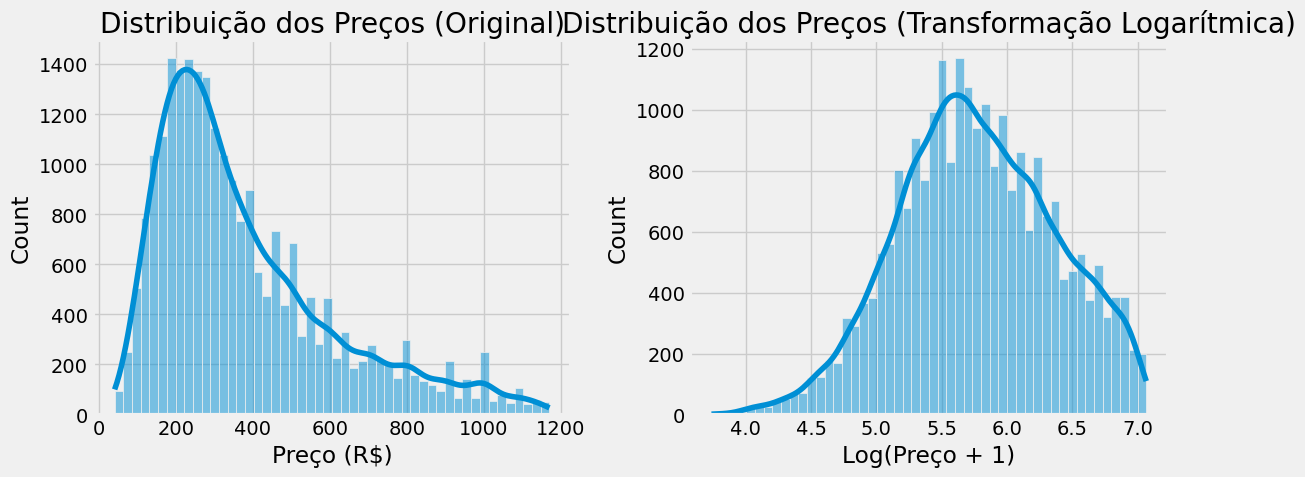

In [53]:
# Use o DataFrame já limpo de outliers, o 'rio_iqr'
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 5))

# Histograma do preço
plt.subplot(1, 2, 1)
sns.histplot(rio_iqr['price'], kde=True, bins=50)
plt.title('Distribuição dos Preços (Original)')
plt.xlabel('Preço (R$)')

# Histograma do log(preço)
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(rio_iqr['price']), kde=True, bins=50) # log1p é mais seguro que log(0)
plt.title('Distribuição dos Preços (Transformação Logarítmica)')
plt.xlabel('Log(Preço + 1)')

plt.tight_layout()
plt.show()

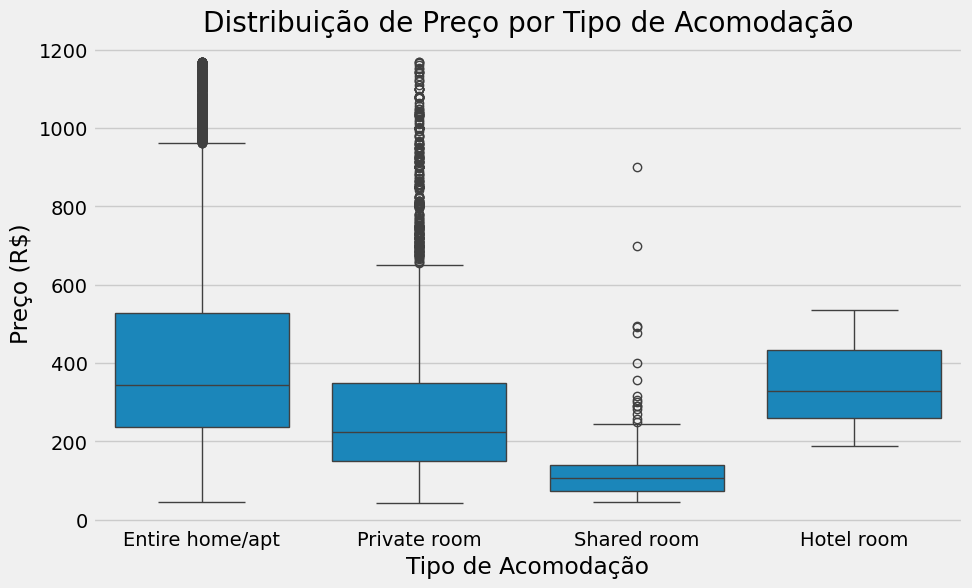

In [54]:
# Manter o índice do rio_iqr para poder buscar as colunas categóricas do df original
rio_iqr_com_categorias = rio_iqr.join(df[['room_type', 'neighbourhood_cleansed', 'host_is_superhost', 'amenities']])

# Boxplot para Room Type vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=rio_iqr_com_categorias)
plt.title('Distribuição de Preço por Tipo de Acomodação')
plt.ylabel('Preço (R$)')
plt.xlabel('Tipo de Acomodação')
plt.show()

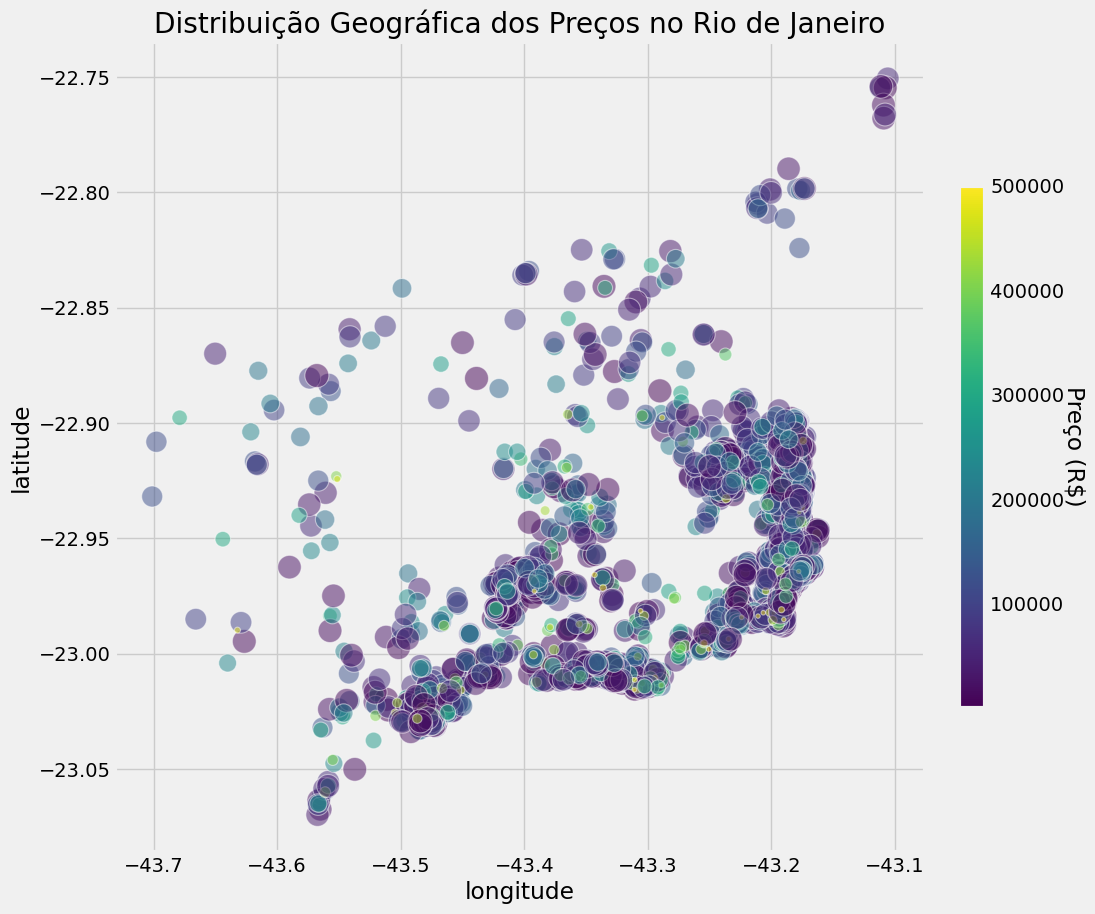

In [55]:
# Gráfico de dispersão dos imóveis, colorido pelo preço
plt.figure(figsize=(10, 10))
scatter_plot = sns.scatterplot(
    x='longitude',
    y='latitude',
    data=df.sample(5000), # Usando uma amostra para não sobrecarregar o gráfico
    hue='price',
    palette='viridis',
    size='price',
    sizes=(10, 300),
    alpha=0.5
)
plt.title('Distribuição Geográfica dos Preços no Rio de Janeiro')

# Melhorando a legenda para ser uma barra de cores
norm = plt.Normalize(rio_listings['price'].min(), rio_listings['price'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Remove a legenda original de pontos e adiciona a barra de cores
scatter_plot.get_legend().remove()
cbar = plt.colorbar(sm, ax=scatter_plot.axes, fraction=0.03, pad=0.04)
cbar.set_label('Preço (R$)', rotation=270, labelpad=15)

plt.show()

## Correlation Heatmap of Rio Listings Features

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute pairwise correlation matrix using Pearson's correlation coefficient
corr_matrix = rio_iqr.corr(method="pearson")

# Display features sorted by correlation strength with the target ('price')
# This helps identify which features are most relevant to predict 'price'
price_corr = corr_matrix["price"].sort_values(ascending=False)

print("Correlation of features with target 'price':\n")
print(price_corr)

Correlation of features with target 'price':

price                1.000000
bedrooms             0.417720
bathrooms            0.376830
accommodates         0.376174
beds                 0.285278
minimum_nights       0.169600
maximum_nights      -0.048076
number_of_reviews   -0.103187
Name: price, dtype: float64


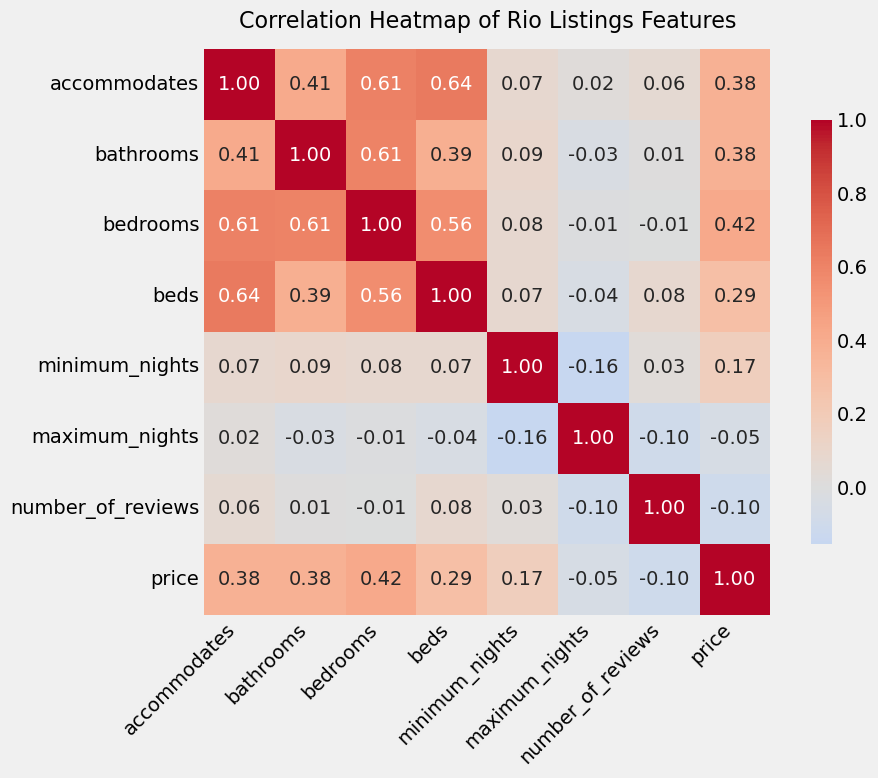

In [57]:
# Visualize correlation matrix

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    annot=True,          # show correlation values
    fmt=".2f",           # format with 2 decimals
    cmap="coolwarm",     # colormap: negative=blue, positive=red
    center=0,            # center color scale at 0
    square=True,         # square cells
    cbar_kws={"shrink": 0.75}  # adjust colorbar size
)

# Add a title to the heatmap
plt.title("Correlation Heatmap of Rio Listings Features", fontsize=16, pad=15)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# End-to-End Solution Pipeline in PyTorch

## Import

In [58]:
import numpy as np
import datetime
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split
import torch.optim as optim
import torch.nn as nn
%matplotlib inline
plt.style.use('fivethirtyeight')

## Architecture class

In [59]:
class Architecture(object):
    def __init__(self, model, loss_fn, optimizer):
        # Here we define the attributes of our class

        # We start by storing the arguments as attributes
        # to use them later
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        # Let's send the model to the specified device right away
        self.model.to(self.device)

        # These attributes are defined here, but since they are
        # not informed at the moment of creation, we keep them None
        self.train_loader = None
        self.val_loader = None

        # These attributes are going to be computed internally
        self.losses = []
        self.val_losses = []
        self.total_epochs = 0

        # Creates the train_step function for our model,
        # loss function and optimizer
        # Note: there are NO ARGS there! It makes use of the class
        # attributes directly
        self.train_step_fn = self._make_train_step_fn()
        # Creates the val_step function for our model and loss
        self.val_step_fn = self._make_val_step_fn()

    def to(self, device):
        # This method allows the user to specify a different device
        # It sets the corresponding attribute (to be used later in
        # the mini-batches) and sends the model to the device
        try:
            self.device = device
            self.model.to(self.device)
        except RuntimeError:
            self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
            print(f"Couldn't send it to {device}, sending it to {self.device} instead.")
            self.model.to(self.device)

    def set_loaders(self, train_loader, val_loader=None):
        # This method allows the user to define which train_loader (and val_loader, optionally) to use
        # Both loaders are then assigned to attributes of the class
        # So they can be referred to later
        self.train_loader = train_loader
        self.val_loader = val_loader

    def _make_train_step_fn(self):
        # This method does not need ARGS... it can refer to
        # the attributes: self.model, self.loss_fn and self.optimizer

        # Builds function that performs a step in the train loop
        def perform_train_step_fn(x, y):
            # Sets model to TRAIN mode
            self.model.train()

            # Step 1 - Computes our model's predicted output - forward pass
            yhat = self.model(x)
            # Step 2 - Computes the loss
            loss = self.loss_fn(yhat, y)
            # Step 3 - Computes gradients for both "a" and "b" parameters
            loss.backward()
            # Step 4 - Updates parameters using gradients and the learning rate
            self.optimizer.step()
            self.optimizer.zero_grad()

            # Returns the loss
            return loss.item()

        # Returns the function that will be called inside the train loop
        return perform_train_step_fn

    def _make_val_step_fn(self):
        # Builds function that performs a step in the validation loop
        def perform_val_step_fn(x, y):
            # Sets model to EVAL mode
            self.model.eval()

            # Step 1 - Computes our model's predicted output - forward pass
            yhat = self.model(x)
            # Step 2 - Computes the loss
            loss = self.loss_fn(yhat, y)
            # There is no need to compute Steps 3 and 4, since we don't update parameters during evaluation
            return loss.item()

        return perform_val_step_fn

    def _mini_batch(self, validation=False):
        # The mini-batch can be used with both loaders
        # The argument `validation`defines which loader and
        # corresponding step function is going to be used
        if validation:
            data_loader = self.val_loader
            step_fn = self.val_step_fn
        else:
            data_loader = self.train_loader
            step_fn = self.train_step_fn

        if data_loader is None:
            return None

        # Once the data loader and step function, this is the same
        # mini-batch loop we had before
        mini_batch_losses = []
        for x_batch, y_batch in data_loader:
            x_batch = x_batch.to(self.device)
            y_batch = y_batch.to(self.device)

            mini_batch_loss = step_fn(x_batch, y_batch)
            mini_batch_losses.append(mini_batch_loss)

        loss = np.mean(mini_batch_losses)
        return loss

    def set_seed(self, seed=42):
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
        torch.manual_seed(seed)
        np.random.seed(seed)

    def train(self, n_epochs, seed=42):
        # To ensure reproducibility of the training process
        self.set_seed(seed)

        for epoch in range(n_epochs):
            # Keeps track of the numbers of epochs
            # by updating the corresponding attribute
            self.total_epochs += 1

            # inner loop
            # Performs training using mini-batches
            loss = self._mini_batch(validation=False)
            self.losses.append(loss)

            # VALIDATION
            # no gradients in validation!
            with torch.no_grad():
                # Performs evaluation using mini-batches
                val_loss = self._mini_batch(validation=True)
                self.val_losses.append(val_loss)

    def save_checkpoint(self, filename):
        # Builds dictionary with all elements for resuming training
        checkpoint = {'epoch': self.total_epochs,
                      'model_state_dict': self.model.state_dict(),
                      'optimizer_state_dict': self.optimizer.state_dict(),
                      'loss': self.losses,
                      'val_loss': self.val_losses}

        torch.save(checkpoint, filename)

    def load_checkpoint(self, filename):
        # Loads dictionary
        checkpoint = torch.load(filename,weights_only=False)

        # Restore state for model and optimizer
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

        self.total_epochs = checkpoint['epoch']
        self.losses = checkpoint['loss']
        self.val_losses = checkpoint['val_loss']

        self.model.train() # always use TRAIN for resuming training

    def predict(self, x):
        # Set is to evaluation mode for predictions
        self.model.eval()
        # Takes aNumpy input and make it a float tensor
        x_tensor = torch.as_tensor(x).float()
        # Send input to device and uses model for prediction
        y_hat_tensor = self.model(x_tensor.to(self.device))
        # Set it back to train mode
        self.model.train()
        # Detaches it, brings it to CPU and back to Numpy
        return y_hat_tensor.detach().cpu().numpy()

    def plot_losses(self):
        fig = plt.figure(figsize=(10, 4))
        plt.plot(self.losses, label='Training Loss', c='b')
        plt.plot(self.val_losses, label='Validation Loss', c='r')
        plt.yscale('log')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.tight_layout()
        return fig

## Data Preparation

In [60]:
rio_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23715 entries, 2 to 42012
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accommodates       23715 non-null  int64  
 1   bathrooms          23715 non-null  float64
 2   bedrooms           23715 non-null  float64
 3   beds               23715 non-null  float64
 4   minimum_nights     23715 non-null  int64  
 5   maximum_nights     23715 non-null  int64  
 6   number_of_reviews  23715 non-null  int64  
 7   price              23715 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 1.6 MB


In [61]:
# ---------------------------------------------------------------------
# 1) Extract features (X) and target (y) from the DataFrame
# ---------------------------------------------------------------------

# Keep all numeric feature columns except the target 'price'
feature_cols = [c for c in rio_iqr.columns if c != "price"]
target_col   = "price"

# Convert to NumPy arrays (float32 is ideal for PyTorch)
X = rio_iqr[feature_cols].to_numpy(dtype=np.float32)     # shape (N, D)
y = rio_iqr[target_col].to_numpy(dtype=np.float32).reshape(-1, 1)  # shape (N, 1)

# Quick sanity checks
assert not np.isnan(X).any(), "Found NaNs in X. Clean/impute before training."
assert not np.isnan(y).any(), "Found NaNs in y. Clean/impute before training."

In [62]:
# ---------------------------------------------------------------------
# 2) Build tensors BEFORE splitting (as you requested)
# ---------------------------------------------------------------------

torch.manual_seed(13)

x_tensor = torch.as_tensor(X).float()   # (N, D)
y_tensor = torch.as_tensor(y).float()   # (N, 1)

# Whole dataset
dataset = TensorDataset(x_tensor, y_tensor)

In [63]:
# ---------------------------------------------------------------------
# 3) Train/validation split using PyTorch's random_split
# ---------------------------------------------------------------------
ratio = 0.8
n_total = len(dataset)
n_train = int(n_total * ratio)
n_val   = n_total - n_train

train_data, val_data = random_split(dataset, [n_train, n_val])

In [64]:
type(train_data)

torch.utils.data.dataset.Subset

In [65]:
type(val_data)

torch.utils.data.dataset.Subset

In [66]:
# ---------------------------------------------------------------------
# Z-score without leakage
# ---------------------------------------------------------------------
from torch.utils.data import Subset

# 0) Get split indices produced by random_split (already done above)
train_idx = train_data.indices
val_idx   = val_data.indices

# 1) Compute mean/std ONLY on training subset
eps = 1e-8
mu  = x_tensor[train_idx].mean(dim=0)
std = x_tensor[train_idx].std(dim=0, unbiased=False)
std = torch.where(std < eps, torch.ones_like(std), std)  # avoid divide-by-zero

y_mu  = y_tensor[train_idx].mean(dim=0)
y_std = y_tensor[train_idx].std(dim=0, unbiased=False)
y_std = torch.where(y_std < eps, torch.ones_like(y_std), y_std)


# 2) Apply z-score to ALL features using training stats
x_tensor_z = (x_tensor - mu) / std
y_tensor_z = (y_tensor - y_mu) / y_std


# 3) Rebuild dataset with normalized features and REUSE the SAME indices
dataset_z  = TensorDataset(x_tensor_z, y_tensor_z)
train_data = Subset(dataset_z, train_idx)
val_data   = Subset(dataset_z, val_idx)

In [67]:
# 4) Recreate the DataLoaders
batch_size  = 16
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(dataset=val_data,   batch_size=batch_size, shuffle=False)

# Quick peek to confirm shapes
xb, yb = next(iter(train_loader))
print(f"Train batch X: {xb.shape} | y: {yb.shape}")  # e.g., (16, D) and (16, 1)

Train batch X: torch.Size([16, 7]) | y: torch.Size([16, 1])


## Model Configuration

In [68]:
# 5) (Optional but safer) Make model input dimension dynamic
# Sets learning rate
lr = 0.001
torch.manual_seed(42)
D = x_tensor.shape[1]  # number of features
model = nn.Sequential(nn.Linear(D, 1))
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.MSELoss(reduction='mean')

## Training

In [69]:
n_epochs = 100
arch = Architecture(model, loss_fn, optimizer)
arch.set_seed(42)
arch.set_loaders(train_loader, val_loader)
arch.train(n_epochs=n_epochs)

In [70]:
fig = arch.plot_losses()

In [71]:
rio_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23715 entries, 2 to 42012
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accommodates       23715 non-null  int64  
 1   bathrooms          23715 non-null  float64
 2   bedrooms           23715 non-null  float64
 3   beds               23715 non-null  float64
 4   minimum_nights     23715 non-null  int64  
 5   maximum_nights     23715 non-null  int64  
 6   number_of_reviews  23715 non-null  int64  
 7   price              23715 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 1.6 MB


In [72]:
# -------------------------------------------------------------
# Suppose you trained and still have mu, std (for X) and y_mu, y_std (for y)
# -------------------------------------------------------------
# Example: one new sample with 7 features (same order as feature_cols)
X_new = np.array([[2.0, 1.0, 2.0, 2.0, 4.0, 100.0, 30.0]], dtype=np.float32)
# (this is just a made-up input)

# -------------------------------------------------------------
# 1) Apply the SAME feature normalization (z-score using training mu/std)
# -------------------------------------------------------------
X_new_t = torch.as_tensor(X_new)
X_new_norm = (X_new_t - mu) / std  # mu, std from TRAIN only

# -------------------------------------------------------------
# 2) Predict with your trained Architecture
# -------------------------------------------------------------
y_pred_z = arch.predict(X_new_norm.numpy())   # prediction in standardized space of y

# -------------------------------------------------------------
# 3) Revert target normalization back to original units
# -------------------------------------------------------------
y_pred_real = y_pred_z * y_std.item() + y_mu.item()

# Convert to scalar
y_pred_real_value = float(y_pred_real.squeeze())

print(f"Predicted price: R$ {y_pred_real_value:.2f}")

Predicted price: R$ 381.53


# EDA e Engenharia/Seleção de Features